# Linear Algebra

## Terms

- *linear combination*: A linear combination of two or more vectors is the sum of multiplication between a scalar and a vector, for each of the vectors.
- *Span*: The set of all possible linear combinations of a given pair of vectors. For 2 vectors in a 2D space, the span is the entire plane where the 2 vectors live (assuming independent vectors). For 2 vectors in a 3D space, the span is still the entire plane where the 2 vectors live (assuming independent vectors). Adding one more vector, independent, will generate a span that covers the entire 3D space.
- *Lineary dependent*: Vectors are linearly dependent if they can be expressed as linear combinations of other vectors. It lives in the span of the other vectors so it is redundant.
- *Linearly independent*: If a vector adds a new dimension to the span, it said to be linearly independent.
- *Linear transformation*: take some input vector to some output vector with these properties: all lines remain lines, they are not curved, and origin must remain fixed. It keeps grid lines parallel and evenly spaced.
- The "basis" of a vector space is a set of linearly independent vectors that span the entire vector space.
- Matrix determinant: the factor by which a linear transformation changes any area

## Vector addition

In mathematics, it is almost always the case that the vector origin is [0,0].

[1,2]+[1,0]= [2,2]

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, colors=None):
    fig, ax = plt.subplots()
    if colors is None:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(vectors)))

    for vector, color in zip(vectors, colors):
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color)

    max_val = np.max(np.abs(vectors)) * 1.2
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_aspect('equal')

    # Add grid, labels, and title
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Plot of {len(vectors)} Vectors')

    # Show plot
    plt.show()

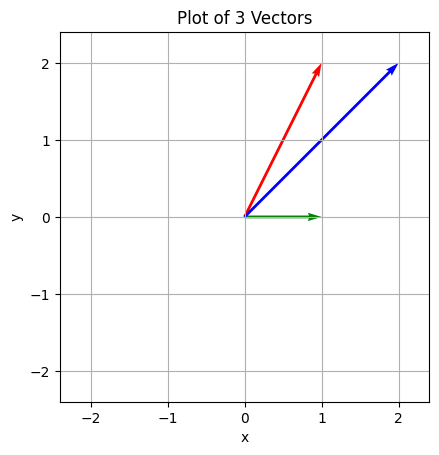

In [40]:

v1 = np.array([1, 2])
v2 = np.array([1, 0])
vectors = [v1, v2, v1+v2]
plot_vectors(vectors, colors=['r', 'g', 'b'])

Now let's scale v1 with scalar 2 and v2 with scalar 4, then multiply. you'll see that the resulting vector reaches a totally new position.

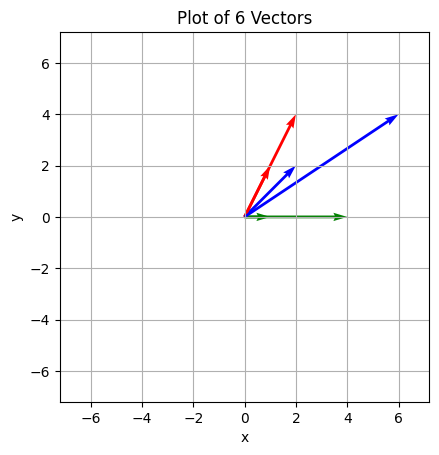

In [42]:
vectors = [v1, v2, v1+v2, v1*2, v2*4, v1*2+v2*4]
plot_vectors(vectors, colors=['r', 'g', 'b', 'r', 'g', 'b'])

## Vector multiplication

### With a scalar (scaling)

[1,2]*2= [2,4]

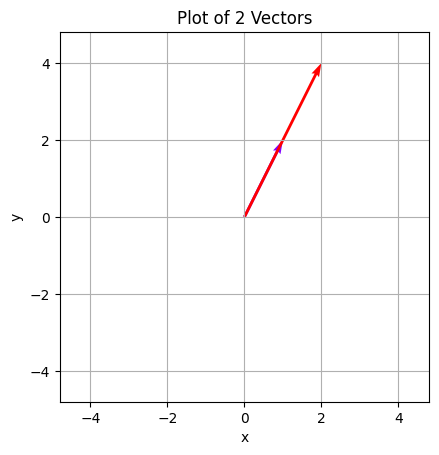

In [28]:
plot_vectors([np.array([1, 2]), np.array([2, 4])])

### Dot product

```
[1,2]*[2,4]= 1*2+2*4=8
```

The geometric interpretation of dot product is that it measures how much one vector points in the direction of another. The larger the dot product between two vectors, the more they point in the same direction and vice versa. It is the product of the projection of one onto the other with the length of the other.

It is a linear transformation from a 2D space to 1D, to a single number.

Similar to matrix transformations, the following transformation:

```
[a,b] * c = a*c+b*d
        d
```
takes the [c,d] vector to the 1D space. 

And similar to matrix transformations, the columns of the matrix (of length one in this case) represents the place where basis vectors land. a is where i-hat lands onto the 1D space, b is where j-hat lands.

Why the relation between dot product and projection? It's because the dot product is also a linear transformation from a 2D space to the number line (1D). Transforming w from 2D to 1D means projecting v on the number line. Remember that in `v * W`, `v` holds the positions where i-hat and j-hat lands on the number line. And v transformed can be expressed in terms of i-hat transformed and j-hat transformed.

np.dot(np.array([1, 2]), np.array([2, 1])) is 4
np.dot(np.array([2, 0]), np.array([0, 2])) is 0
np.dot(np.array([1, 1]), np.array([2, 2])) is 4


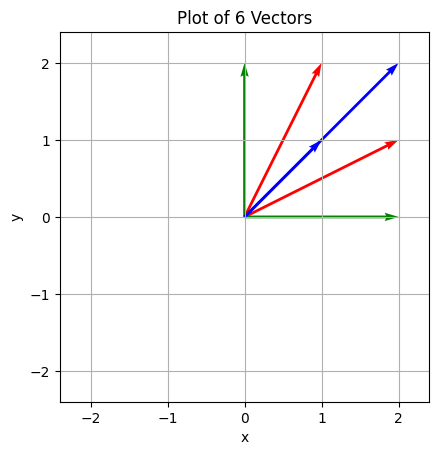

In [74]:
print(f"np.dot(np.array([1, 2]), np.array([2, 1])) is {np.dot(np.array([1, 2]), np.array([2, 1]))}")
print(f"np.dot(np.array([2, 0]), np.array([0, 2])) is {np.dot(np.array([2, 0]), np.array([0, 2]))}")
print(f"np.dot(np.array([1, 1]), np.array([2, 2])) is {np.dot(np.array([1, 1]), np.array([2, 2]))}")
plot_vectors([np.array([1, 2]), np.array([2, 1]), np.array([2, 0]), np.array([0, 2]), np.array([1, 1]), np.array([2, 2])], colors=['r', 'r', 'g', 'g', 'b', 'b'])


### Cross product

```text
v1    w1   v2*w3 - w2*v3
v2 x  w2 = v3*w1 - w3*v1
v3    w3   v1*w2 - w1*v2
```

The resulting vector is a vector of length = the determinant of the v and w in the 2D space that they define (the area of the palalelogram that they define) perpendicular to that paralelogram.

### Orthogonal vectors (perpendicular)

[0,2]*[2,0]= [0,0]

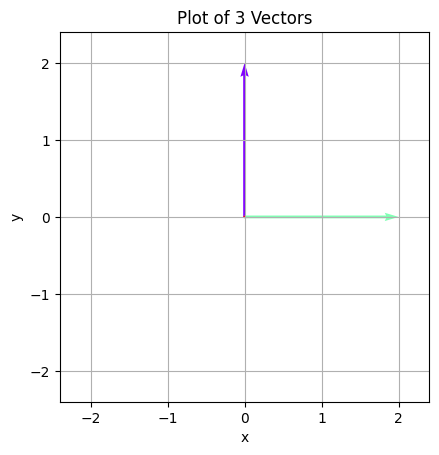

In [31]:
plot_vectors([np.array([0, 2]), np.array([2, 0]), np.array([0, 0])])

## Linearily dependent vectors

Everything is squished to the individual span of any of these 2 vectors which are identical, hence, to a single line.

Let,s make i-hat and jhat dependent. Will see that everything is squished into a single line:

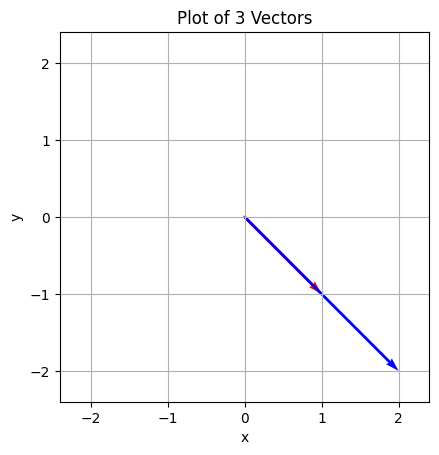

In [44]:
# Define the matrix
matrix = np.array([[1, 0], [-1, 0]])

# Perform matrix-vector multiplication
plot_vectors([np.dot(matrix, ihat), np.dot(matrix, jhat), np.dot(matrix, vector3)], ['r', 'g', 'b'])

## Matrix tranformation

The matrix [[3,2],[-2,1]] means that we have two basis vectors [3,2] and [-2,1]. It's where the i-hat, [1,0] and j-hat, [0,1] lands. A vector [x,y] is transformed to [3x+2y,-2x+y].

*The columns of the transformation matrix are the coordintates where the i-hat and j-hat will land*

But where does this representation of i-hat transformed and j-hat transformed, in the form of a matrix, come from. A linear transformation keeps the lines parallel and keeps the spacing. As in the initial space, [x,y] is x*i-hat+y*j-hat, in the transfomed space, [x,y] transformed is x*i-hat transformed [a,b]+y*j-hat transformed [c,d].

```
x*[a,b] + y*[c,d] = [x*a+y*c, x*b+y*d]
```

This is the same as building a matrix where the columns are the transformed basis vectors and multiplying the matrix with [x,y]:

```text
a c * x = a*x+c*y
b d   y   b*x+d*y

 3 2   *  1  = 3*1+0*-2 =  3  =>  3
-2 1      0    1*-2+0*1 = -2     -2
                                                => [[3,2],[-2,1]]
 3 2   *  0 = 0*3+1*2  = 2 => 2
-2 1      1   0*-2+1*1 = 1    1

 3 2   * 2 = 2*3+3*2 = 12  => 12
-2 1     3  -2*2+3*1  = 1     1
```

Note that the vector is a column vector, and that the matrix sits on the left.

In [38]:
ihat = np.array([1, 0])
jhat = np.array([0, 1])
vector3 = np.array([2, 3])
matrix = np.array([[3, 2], [-2, 1]])

np.dot(matrix,ihat), np.dot(matrix, jhat), np.dot(matrix, vector3)

(array([ 3, -2]), array([2, 1]), array([12, -1]))

Let's start with an initial space, with i-hat, j-hat and the [2,3] vector:

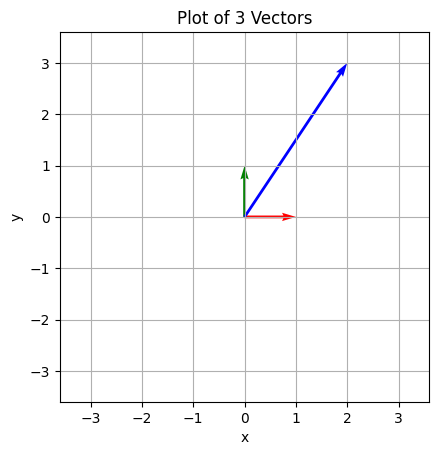

In [33]:
# Define the vectors
ihat = np.array([1, 0])
jhat = np.array([0, 1])
vector3 = np.array([2, 3])
plot_vectors([ihat, jhat, vector3], ['r', 'g', 'b'])

Now, let's rotate right by by 90 degrees. That means:

- i-hat lands on [0,-1], j-hat lands on [1,0]. The transformation matrix takes the new i-hat as the first column and j-hat as the second column. [[0,1],[-1,0]]

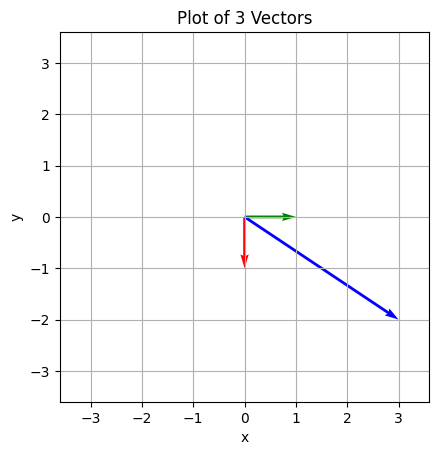

In [34]:
# Define the matrix
matrix = np.array([[0, 1], [-1, 0]])

# Perform matrix-vector multiplication
plot_vectors([np.dot(matrix, ihat), np.dot(matrix, jhat), np.dot(matrix, vector3)], ['r', 'g', 'b'])


We have basis vectors [1,0] and [0,1]
And the transformation matrix:
[[3  1]
 [0  2]]

[[1 0] * [[3 1] =  [[a b]   = [[3 1]
 [0 1]]   [0 2]]    [c d]]     [0 2]]


In [13]:
def transform_and_plot(t_matrix):
    # Define the standard basis vectors
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    e3 = np.array([2, 2])
    e4 = np.array([-1, 1])

    # Apply the transformation
    transformed_e1 = t_matrix @ e1
    transformed_e2 = t_matrix @ e2
    transformed_e3 = t_matrix @ e3
    transformed_e4 = t_matrix @ e4

    # Plotting
    fig, ax = plt.subplots()
    ax.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='r', label='e1 (original)')
    ax.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='b', label='e2 (original)')
    ax.quiver(0, 0, e3[0], e3[1], angles='xy', scale_units='xy', scale=1, color='y', label='e3 (original)')
    ax.quiver(0, 0, e4[0], e4[1], angles='xy', scale_units='xy', scale=1, color='g', label='e4 (original)')
    ax.quiver(0, 0, transformed_e1[0], transformed_e1[1], angles='xy', scale_units='xy', scale=1, color='r', label="Transformed e1")
    ax.quiver(0, 0, transformed_e2[0], transformed_e2[1], angles='xy', scale_units='xy', scale=1, color='b', label="Transformed e2")
    ax.quiver(0, 0, transformed_e3[0], transformed_e3[1], angles='xy', scale_units='xy', scale=1, color='y', label="Transformed e3")
    ax.quiver(0, 0, transformed_e4[0], transformed_e4[1], angles='xy', scale_units='xy', scale=1, color='g', label="Transformed e4")

    # Set the limits and aspect
    ax.set_xlim(-4, 8)
    ax.set_ylim(-4, 8)
    ax.set_aspect('equal')

    # Grid and legend
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()

    # Set labels
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Transformation of Basis Vectors')

    # Show plot
    plt.show()


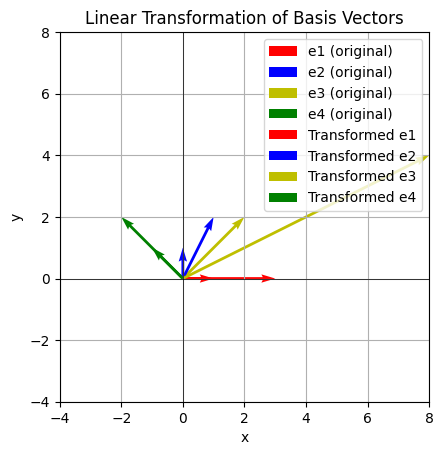

In [14]:
import numpy as np
import matplotlib.pyplot as plt

transform_and_plot(np.array([[3, 1],
                             [0, 2]]))


For this transformation, e1 and e4 keeps their span after the transformation. These are eigen vectors.

In [20]:
theta = np.pi / 2

# Define the 90-degree rotation matrix
rotation_matrix = np.array([[1, 0],
                            [0, 1]])
rotation_matrix

array([[1, 0],
       [0, 1]])

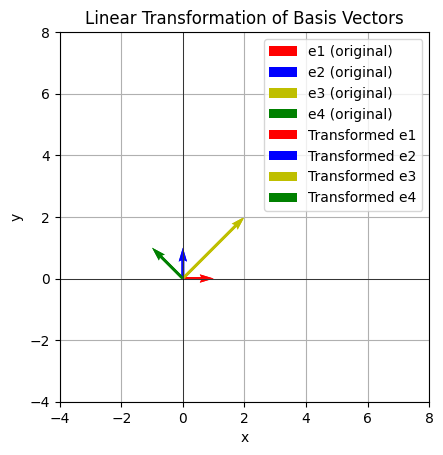

In [21]:
transform_and_plot(rotation_matrix)

## Matrix determinant

Let's first plot the square defined by the basis vectors. 

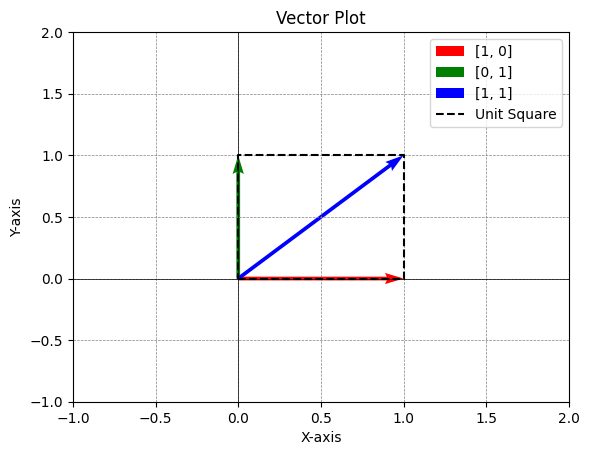

In [46]:

# Define the vectors
vector1 = np.array([1, 0])
vector2 = np.array([0, 1])
vector3 = np.array([1, 1])

# Create a plot
plt.figure()
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label='[1, 0]')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='g', label='[0, 1]')
plt.quiver(0, 0, vector3[0], vector3[1], angles='xy', scale_units='xy', scale=1, color='b', label='[1, 1]')

square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Plot the square
plt.plot(square_vertices[:, 0], square_vertices[:, 1], 'k--', label='Unit Square')

# Set the limits of the plot
plt.xlim(-1, 2)
plt.ylim(-1, 2)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Show the plot
plt.title('Vector Plot')
plt.show()

As you can see the area of the square is 1.
Now, let's apply the transformation `[[3,2],[0,2]]`

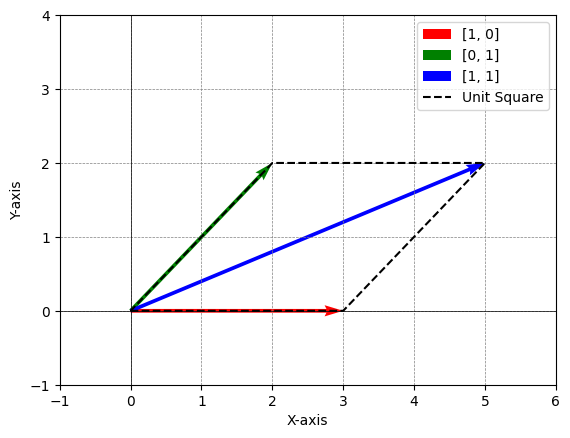

In [61]:
m = np.array([[3,2],[0,2]])

vector1 = np.array([1, 0])
vector2 = np.array([0, 1])
vector3 = np.array([1, 1])

vector1 = np.dot(m, vector1)
vector2 = np.dot(m, vector2)
vector3 = np.dot(m, vector3)

# Create a plot
plt.figure()
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label='[1, 0]')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='g', label='[0, 1]')
plt.quiver(0, 0, vector3[0], vector3[1], angles='xy', scale_units='xy', scale=1, color='b', label='[1, 1]')

square_vertices = np.array([np.dot(m, [0, 0]), np.dot(m, [1, 0]), np.dot(m, [1, 1]), np.dot(m, [0, 1]), np.dot(m, [0, 0])])

# Plot the square
plt.plot(square_vertices[:, 0], square_vertices[:, 1], 'k--', label='Unit Square')

# Set the limits of the plot
plt.xlim(-1, 6)
plt.ylim(-1, 4)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()


After applying the transformation, the area of the transform square of unit 1 is 6.

Now let's compute the determinant of the matrix:
```
det([[3,2],
     [0,2]]) = 3*2-0*2 = 6
```

## Inverse matrices

A^-1 is the inverse of A if, after applying the transformation A, and then the transformation A^-1, it bring the space to its original form. It reverts the transformation applied by A.

```
A^-1 * A = I
```

The Identity matrix it's the matrix that does nothing. it keeps the unit vectors as basis vectors on each column, so it has 1 on the diagonal and zeros in the rest of the matrix.

## Eigen vectors

These are the 2 vectors that, after a transformation, keep the same span.
Their eigen value is the factor by which they are streched by the transformation.